# Aula 7 - Espaços de features polinomiais - aumentando a complexidade de hipóteses

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Espaços de features polinomiais

_____

## 1) Espaços de features polinomiais

Muitas vezes, temos dados que simplesmente não se ajustam às hipóteses simples, lineares, que conhecemos até o momento.

Quando isso acontece, é muito provável que soframos **underfitting**, pois uma forma funcional demasiadamente simples de uma hipótese pode não ser capaz de capturar o comportamento de uma função teórica $\mathcal{F}$ mais complexa, conforme refletido pela amostra.

Nestes casos, a solução é simples: basta escolhermos hipóteses mais complexas!

Pra começar nosso estudo, vamos utilizar dados naturais bem simples: 


https://archive.ics.uci.edu/ml/datasets/auto+mpg  
http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data  

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('dados_modelos/auto-mpg.csv')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [35]:
df.shape

(398, 8)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [37]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [38]:
df_temp = df.select_dtypes(include=np.number).dropna(axis='rows').copy()
df_temp.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [39]:
df_temp.shape

(392, 8)

In [40]:
X = df_temp.drop(columns=['MPG'])
y = df_temp[['MPG']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

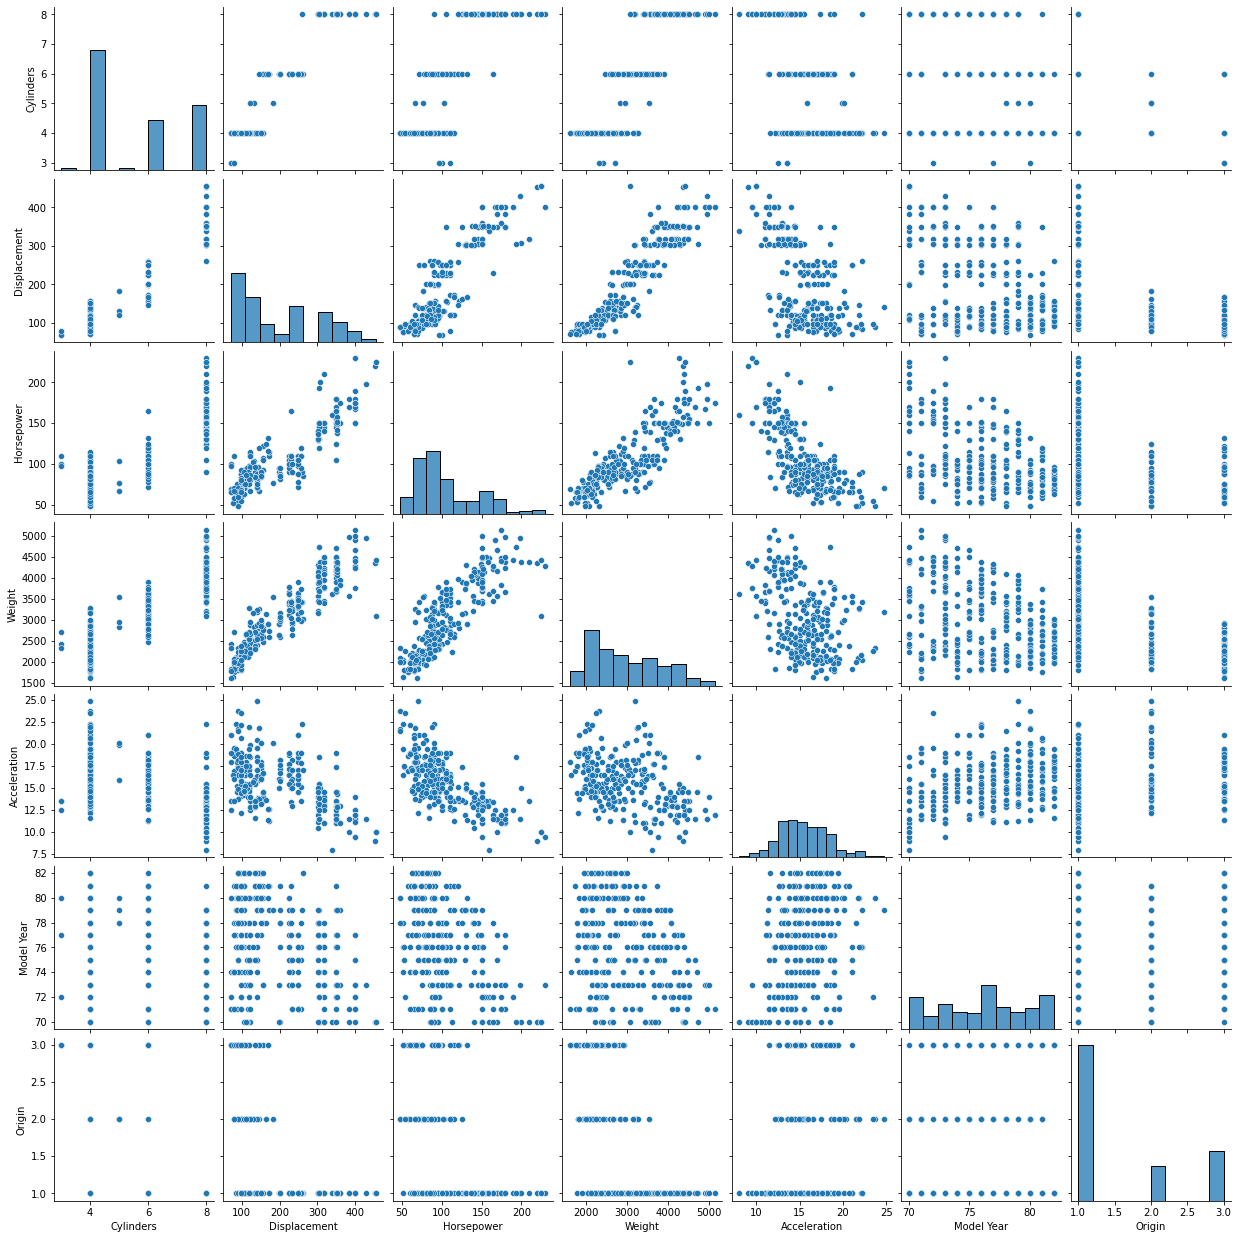

In [42]:
sns.pairplot(X_train)

In [43]:
X_train = X_train.drop(columns=['Cylinders', 'Origin', 'Model Year'])

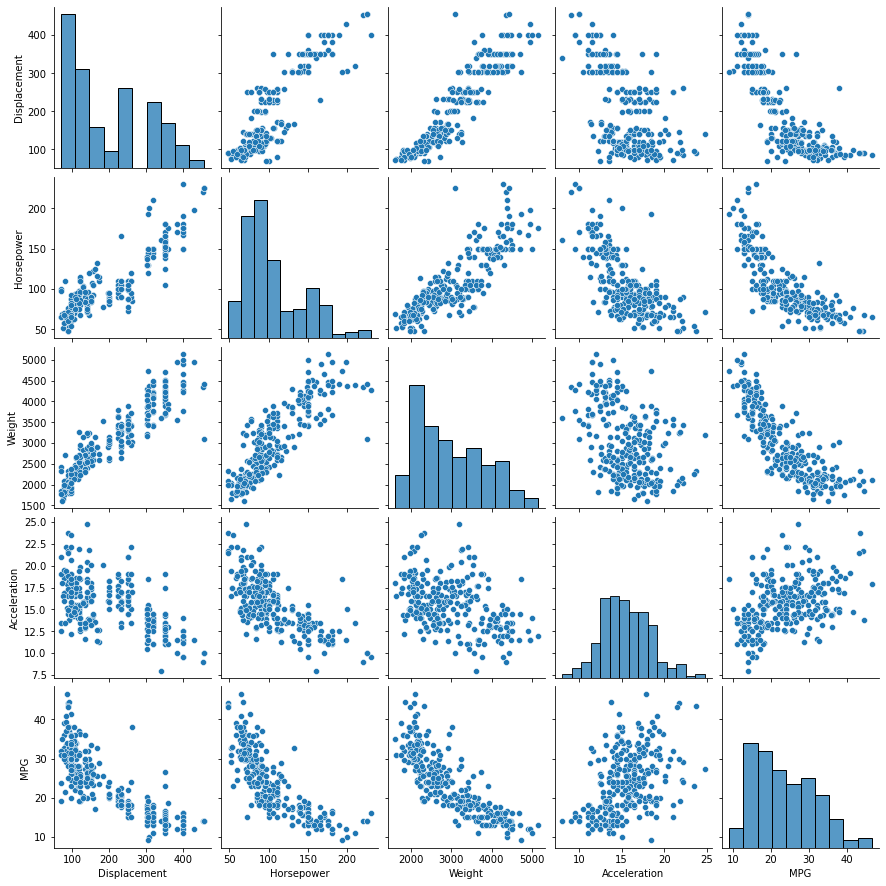

In [44]:
sns.pairplot(pd.concat([X_train, y_train], axis=1))

In [45]:
corr_feat_target = pd.concat([X_train, y_train], axis=1).corr()

In [46]:
corr_feat_target['MPG'].abs().sort_values(ascending=False)

MPG             1.000000
Weight          0.835691
Displacement    0.816913
Horsepower      0.791353
Acceleration    0.442052
Name: MPG, dtype: float64

In [47]:
X_train = X_train[['Weight']]
X_test = X_test[X_train.columns]

<AxesSubplot:xlabel='Weight', ylabel='MPG'>

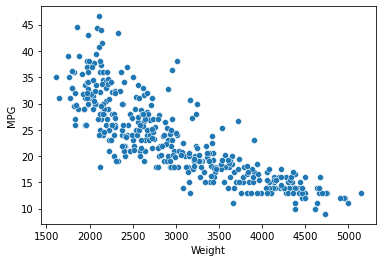

In [48]:
sns.scatterplot(x=X['Weight'], y=y['MPG'])

Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Hipótese atual:

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x$$

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**

Ou seja, o termo quadrático que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

________

Um outro exemplo: considere uma hipótese linear para um modelo com duas features $x_1, x_2$:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2$$

Caso queiramos produzir um modelo quadrático, temos que incluir os termos $x_1^2, x_2^2$ e também $x_1x_2$ (que também é quadrático), de modo que nossa hipótese fica sendo:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2 + b_3 x_1^2 + b_4 x_2^2 + b_5 x_1 x_2$$

O que não deixa de ser uma **regressão linear múltipla** de 5 variáveis ($x_3 \equiv x_1^2$, $x_4 \equiv x_2^2$ e $x_5 \equiv x_1x_2$):

$$f_{h, \  \vec{b}}(x_1, x_2, x_3, x_4, x_5) = b_0 + b_1x_1 + b_2x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5$$

E assim por diante! ;)

Assim, para criarmos um modelo quadrático para nossos dados, bastaria criarmos uma nova feature $z = x^2$, e passar apenas esta nova feature para o  modelo de regressão linear **simples**. Isso equivale a usar uma hipótese $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Vejamos:

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
estimador_linear = LinearRegression()
estimador_linear.fit(X_train, y_train)

LinearRegression()

In [51]:
X_train.min()[0]

1613.0

In [52]:
x_reg = [X_train.min()[0], X_train.max()[0]]
y_reg = estimador_linear.predict(np.array(x_reg).reshape(-1, 1)).flatten()

/Users/gustavoperbone/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
x_reg, y_reg

([1613.0, 5140.0], array([34.60457609,  6.4422414 ]))

<AxesSubplot:xlabel='Weight', ylabel='MPG'>

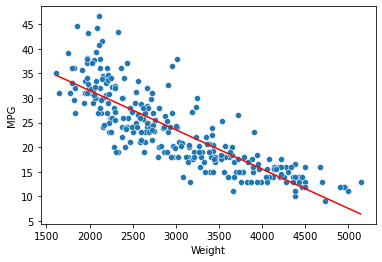

In [54]:
sns.scatterplot(x=X_train['Weight'], y=y['MPG'])
sns.lineplot(x=x_reg, y=y_reg, color='r')

In [55]:
y_pred = estimador_linear.predict(X_test)

In [56]:
r2_score(y_test, y_pred)

0.6653479018765671

Qual polinomio e como aplicar?

Mas esse é um procedimento bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é nosso primeiro exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "estimadores", no sentido de que eles devem 
ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo (data leakage).

Lembre-se de fitar o transformados sempre nos dados de treino, apenas!

Vejamos o uso da classe:

https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
pf = PolynomialFeatures(2)

pf.fit(X_train)

PolynomialFeatures()

In [59]:
vars(pf)

{'degree': 2,
 'interaction_only': False,
 'include_bias': True,
 'order': 'C',
 'feature_names_in_': array(['Weight'], dtype=object),
 'n_features_in_': 1,
 '_min_degree': 0,
 '_max_degree': 2,
 'n_output_features_': 3,
 '_n_out_full': 3}

In [60]:
X_train.head()

,Weight
110,2379.0
17,2587.0
320,2434.0
24,2648.0
128,3336.0


In [61]:
X_trans = pd.DataFrame(pf.transform(X_train))
X_trans.head()

,0,1,2
0,1.0,2379.0,5659641.0
1,1.0,2587.0,6692569.0
2,1.0,2434.0,5924356.0
3,1.0,2648.0,7011904.0
4,1.0,3336.0,11128896.0


In [62]:
estimador_trans = LinearRegression()

estimador_trans.fit(X_trans, y_train)

LinearRegression()

In [63]:
vars(estimador_trans)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 3,
 'coef_': array([[ 0.00000000e+00, -1.97950335e-02,  1.85056975e-06]]),
 '_residues': array([], dtype=float64),
 'rank_': 2,
 'singular_': array([8.91931580e+07, 1.76425404e+03, 0.00000000e+00]),
 'intercept_': array([64.95193028])}

In [64]:
pf_test = PolynomialFeatures(2)

pf_test.fit(X_test)

X_test_trans= pf_test.transform(X_test)

In [65]:
y_pred = estimador_trans.predict(X_test_trans)

In [66]:
r2_score(y_test, y_pred)

0.6790833164600331

<AxesSubplot:xlabel='Weight', ylabel='MPG'>

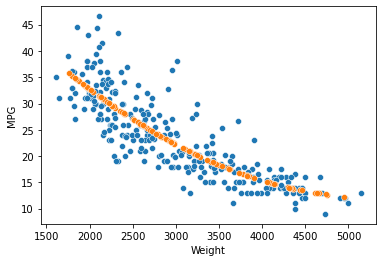

In [67]:
sns.scatterplot(x=X_train['Weight'], y=y['MPG'])
sns.scatterplot(x=X_test['Weight'], y=y_pred.flatten())

In [68]:
r2_score(y_test, y_pred)

0.6790833164600331

____
____
____

### Avaliação por Rubrica  
Deve ser entregue hoje:  
[Avalie seu professor](https://forms.gle/MrnbikmzAC9aXhuG8)  
[Auto avaliação](https://forms.gle/PKfPDV9CjYqkrYH8A)  